Import all libraries 

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from scipy.stats import kurtosis
import scipy


#Importing Data from CSV file

In [ ]:
df=pd.read_csv("application_data (1).csv")

In [ ]:
pa_df=pd.read_csv("previous_application.csv")

In [ ]:
col_df=pd.read_csv("columns_description.csv", encoding='latin1')


In [ ]:
col_df.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [ ]:
col_df['Row']

0                     SK_ID_CURR
1                         TARGET
2             NAME_CONTRACT_TYPE
3                    CODE_GENDER
4                   FLAG_OWN_CAR
                 ...            
155               DAYS_FIRST_DUE
156    DAYS_LAST_DUE_1ST_VERSION
157                DAYS_LAST_DUE
158             DAYS_TERMINATION
159    NFLAG_INSURED_ON_APPROVAL
Name: Row, Length: 160, dtype: object

In [ ]:
col_df.shape

(160, 5)

#viewing data

In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pa_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(307511, 122)

In [ ]:
df.ndim

2

In [ ]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
31076,136071,0,Cash loans,F,N,Y,3,117000.0,117162.0,7825.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
31077,136072,0,Cash loans,M,Y,Y,0,247500.0,168102.0,17964.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31078,136073,1,Cash loans,F,N,Y,0,180000.0,562491.0,27058.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
31079,136074,0,Cash loans,F,Y,Y,0,270000.0,728460.0,62653.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
31080,136075,0,Cash loans,F,Y,N,0,47250.0,314055.0,11637.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
##gives statestical Description of continues data
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,31081.000000,31081.000000,31081.000000,3.108100e+04,3.108100e+04,31081.000000,3.105500e+04,31081.000000,31081.000000,31081.000000,...,31080.000000,31080.000000,31080.000000,31080.000000,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000
mean,118092.231524,0.080274,0.415881,1.720948e+05,6.001104e+05,27150.678115,5.394902e+05,0.020760,-16031.038834,63908.694958,...,0.008526,0.000740,0.000579,0.000386,0.007143,0.007887,0.033110,0.270275,0.261384,1.888616
std,10423.676420,0.271721,0.722285,6.700652e+05,4.030235e+05,14675.416544,3.704613e+05,0.013759,4356.541840,141375.632922,...,0.091945,0.027194,0.024059,0.019646,0.088522,0.116423,0.197508,0.929676,0.609019,1.868162
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25182.000000,-16365.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,109063.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16452.000000,2.385000e+05,0.010006,-19669.000000,-2781.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,118135.000000,0.000000,0.000000,1.467000e+05,5.172660e+05,24939.000000,4.500000e+05,0.018850,-15755.000000,-1223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,127119.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34681.500000,6.795000e+05,0.028663,-12374.000000,-286.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,136075.000000,1.000000,9.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7680.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,6.000000,6.000000,24.000000,8.000000,25.000000


In [ ]:
#gives statestical Description of catorgerical data
df.describe(include='all')


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,31081.000000,31081.000000,31081,31081,31081,31081,31081.000000,3.108100e+04,3.108100e+04,31081.000000,...,31080.000000,31080.000000,31080.000000,31080.000000,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000
unique,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,28084,20438,20474,21597,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,118092.231524,0.080274,NaN,NaN,NaN,NaN,0.415881,1.720948e+05,6.001104e+05,27150.678115,...,0.008526,0.000740,0.000579,0.000386,0.007143,0.007887,0.033110,0.270275,0.261384,1.888616
std,10423.676420,0.271721,NaN,NaN,NaN,NaN,0.722285,6.700652e+05,4.030235e+05,14675.416544,...,0.091945,0.027194,0.024059,0.019646,0.088522,0.116423,0.197508,0.929676,0.609019,1.868162
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,2052.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,109063.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16452.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,118135.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.467000e+05,5.172660e+05,24939.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,127119.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34681.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


#2:: Data Preparation

##as data is having huge number of lines, we are considering appicable columns only by looking at data set

In [ ]:
new_df=df[['SK_ID_CURR','TARGET','DAYS_EMPLOYED','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_EMAIL','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','ORGANIZATION_TYPE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','DAYS_LAST_PHONE_CHANGE']]

In [ ]:
new_df.head()

,SK_ID_CURR,TARGET,DAYS_EMPLOYED,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,DAYS_LAST_PHONE_CHANGE
0,100002,1,-637,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,...,2,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,-1134.0
1,100003,0,-1188,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,...,1,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,-828.0
2,100004,0,-225,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,...,2,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,-815.0
3,100006,0,-3039,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,...,2,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,-617.0
4,100007,0,-3038,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,...,2,0,0,Religion,NaN,0.322738,NaN,NaN,NaN,-1106.0


In [ ]:
#cheking shape of new data, we have now reduced our no of columns from 122 to 28
new_df.shape

(307511, 30)

In [ ]:
#checking names of columns of new data
new_df.columns

Index(['SK_ID_CURR', 'TARGET', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

####reanaming the column names

In [ ]:
list=['Cust_ID','TARGET','DAYS_EMPLOYED','INCOME', 'Loan_AMT', 'ANNUITY',
       'GOODS_PRICE', 'INCOME_TYPE', 'EDUCATION',
       'FAMILY_STATUS', 'curr_HOUSING_TYPE', 'age',
       'Work_Exp', 'REGISTRATION_change', 'DAYS_ID_PUBLISH', 'MOBIL_given',
       'EMAIL_given', 'OCCUPATION_TYPE', 'Family_MEMBERS_no',
       'REGION_CLIENT', 'REGION_CLIENT_CITY',
       'Perman_add_NOT_cont_REGION', 'perman_add_NOT_WORK_add',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'LAST_PHONE_CHANGE']

In [ ]:
new_df.columns=list

In [ ]:
new_df.columns

Index(['Cust_ID', 'TARGET', 'DAYS_EMPLOYED', 'INCOME', 'Loan_AMT', 'ANNUITY',
       'GOODS_PRICE', 'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS',
       'curr_HOUSING_TYPE', 'age', 'Work_Exp', 'REGISTRATION_change',
       'DAYS_ID_PUBLISH', 'MOBIL_given', 'EMAIL_given', 'OCCUPATION_TYPE',
       'Family_MEMBERS_no', 'REGION_CLIENT', 'REGION_CLIENT_CITY',
       'Perman_add_NOT_cont_REGION', 'perman_add_NOT_WORK_add',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'LAST_PHONE_CHANGE'],
      dtype='object')

##checking for columns with null values

In [ ]:
def null_values(new_df):
    return round((new_df.isnull().sum()*100/len(new_df)).sort_values(ascending = False),2)

In [ ]:
#displaying columns with Percentage of null values
null_values(new_df)

BASEMENTAREA_AVG              58.52
EXT_SOURCE_1                  56.38
APARTMENTS_AVG                50.75
OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
EXT_SOURCE_2                   0.21
GOODS_PRICE                    0.09
ANNUITY                        0.00
Family_MEMBERS_no              0.00
LAST_PHONE_CHANGE              0.00
ORGANIZATION_TYPE              0.00
perman_add_NOT_WORK_add        0.00
Perman_add_NOT_cont_REGION     0.00
REGION_CLIENT_CITY             0.00
REGION_CLIENT                  0.00
Cust_ID                        0.00
INCOME                         0.00
MOBIL_given                    0.00
DAYS_ID_PUBLISH                0.00
REGISTRATION_change            0.00
Work_Exp                       0.00
age                            0.00
curr_HOUSING_TYPE              0.00
FAMILY_STATUS                  0.00
EDUCATION                      0.00
INCOME_TYPE                    0.00
Loan_AMT                       0.00
EMAIL_given                 

BASEMENTAREA_AVG              58.52
EXT_SOURCE_1                  56.38

APARTMENTS_AVG                50.75

OCCUPATION_TYPE               31.35

EXT_SOURCE_3                  19.83

these are the columns having maximum null values

In [ ]:
#number of null values per column
print("missing values : ",new_df.isna().sum().sort_values(ascending = False))

missing values :  BASEMENTAREA_AVG              179943
EXT_SOURCE_1                  173378
APARTMENTS_AVG                156061
OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
EXT_SOURCE_2                     660
GOODS_PRICE                      278
ANNUITY                           12
Family_MEMBERS_no                  2
LAST_PHONE_CHANGE                  1
ORGANIZATION_TYPE                  0
perman_add_NOT_WORK_add            0
Perman_add_NOT_cont_REGION         0
REGION_CLIENT_CITY                 0
REGION_CLIENT                      0
Cust_ID                            0
INCOME                             0
MOBIL_given                        0
DAYS_ID_PUBLISH                    0
REGISTRATION_change                0
Work_Exp                           0
age                                0
curr_HOUSING_TYPE                  0
FAMILY_STATUS                      0
EDUCATION                          0
INCOME_TYPE                        0
Loan_AMT            

##Replacing null values with NAN

In [ ]:
#Replacing null values with NAN for all the columns
new_df=new_df.replace(np.nan, 'NAN')

###We reaplaced all empty columns with NAN

#Understanding of the variables Categorical variables

In [ ]:
#taking info to check Column name,  Non-Null Count,   Dtype and sape of data (307511X28 )
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Cust_ID                     307511 non-null  int64  
 1   INCOME                      307511 non-null  float64
 2   Loan_AMT                    307511 non-null  float64
 3   ANNUITY                     307511 non-null  object 
 4   GOODS_PRICE                 307511 non-null  object 
 5   INCOME_TYPE                 307511 non-null  object 
 6   EDUCATION                   307511 non-null  object 
 7   FAMILY_STATUS               307511 non-null  object 
 8   curr_HOUSING_TYPE           307511 non-null  object 
 9   age                         307511 non-null  int64  
 10  Work_Exp                    307511 non-null  int64  
 11  REGISTRATION_change         307511 non-null  float64
 12  DAYS_ID_PUBLISH             307511 non-null  int64  
 13  MOBIL_given   

#cheking statisticsal summary of all the columns


In [ ]:
#statisticsal summary of all the numric columns
new_df.describe()

,Cust_ID,INCOME,Loan_AMT,age,Work_Exp,REGISTRATION_change,DAYS_ID_PUBLISH,MOBIL_given,EMAIL_given,REGION_CLIENT,REGION_CLIENT_CITY,Perman_add_NOT_cont_REGION,perman_add_NOT_WORK_add
count,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,1.687979e+05,5.990260e+05,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.056720,2.052463,2.031521,0.015144,0.050769
std,102790.175348,2.371231e+05,4.024908e+05,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.231307,0.509034,0.502737,0.122126,0.219526
min,100002.000000,2.565000e+04,4.500000e+04,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,189145.500000,1.125000e+05,2.700000e+05,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,278202.000000,1.471500e+05,5.135310e+05,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000
75%,367142.500000,2.025000e+05,8.086500e+05,-12413.000000,-289.000000,-2010.000000,-1720.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000
max,456255.000000,1.170000e+08,4.050000e+06,-7489.000000,365243.000000,0.000000,0.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000


In [ ]:
#checking corrilation between columns of numric data
new_df.corr()

,Cust_ID,INCOME,Loan_AMT,age,Work_Exp,REGISTRATION_change,DAYS_ID_PUBLISH,MOBIL_given,EMAIL_given,REGION_CLIENT,REGION_CLIENT_CITY,Perman_add_NOT_cont_REGION,perman_add_NOT_WORK_add
Cust_ID,1.000000,-0.001820,-0.000343,-0.001500,0.001366,-0.000973,-0.000384,0.002804,0.000281,-0.001075,-0.001138,-0.000283,0.001097
INCOME,-0.001820,1.000000,0.156870,0.027261,-0.064223,0.027805,0.008506,0.000325,0.038378,-0.085465,-0.091735,0.031191,0.062340
Loan_AMT,-0.000343,0.156870,1.000000,-0.055436,-0.066838,0.009621,-0.006575,0.001436,0.016632,-0.101776,-0.110915,0.024010,0.051929
age,-0.001500,0.027261,-0.055436,1.000000,-0.615864,0.331912,0.272691,-0.003084,0.088208,0.009361,0.008073,0.065486,0.095819
Work_Exp,0.001366,-0.064223,-0.066838,-0.615864,1.000000,-0.210242,-0.272378,0.000818,-0.062112,0.032750,0.034624,-0.035803,-0.107150
REGISTRATION_change,-0.000973,0.027805,0.009621,0.331912,-0.210242,1.000000,0.101896,-0.000100,0.034388,0.080210,0.074038,0.028213,0.036787
DAYS_ID_PUBLISH,-0.000384,0.008506,-0.006575,0.272691,-0.272378,0.101896,1.000000,-0.002293,0.027505,-0.005103,-0.007737,0.034757,0.048071
MOBIL_given,0.002804,0.000325,0.001436,-0.003084,0.000818,-0.000100,-0.002293,1.000000,0.000442,0.000186,0.000113,0.000224,0.000417
EMAIL_given,0.000281,0.038378,0.016632,0.088208,-0.062112,0.034388,0.027505,0.000442,1.000000,-0.052063,-0.050778,0.018632,0.031092
REGION_CLIENT,-0.001075,-0.085465,-0.101776,0.009361,0.032750,0.080210,-0.005103,0.000186,-0.052063,1.000000,0.950842,-0.044166,-0.139890


In [ ]:
#statisticsal summary of all the non numric columns
new_df.describe(include='all')

,Cust_ID,TARGET,DAYS_EMPLOYED,INCOME,Loan_AMT,ANNUITY,GOODS_PRICE,INCOME_TYPE,EDUCATION,FAMILY_STATUS,...,REGION_CLIENT_CITY,Perman_add_NOT_cont_REGION,perman_add_NOT_WORK_add,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511,307511,307511,...,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,307510.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,5,6,...,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Working,Secondary / secondary special,Married,...,NaN,NaN,NaN,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158774,218391,196432,...,NaN,NaN,NaN,67992,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,63815.045904,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,NaN,NaN,NaN,...,2.031521,0.015144,0.050769,NaN,0.502130,5.143927e-01,0.510853,0.11744,0.088442,-962.858788
std,102790.175348,0.272419,141275.766519,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,NaN,NaN,NaN,...,0.502737,0.122126,0.219526,NaN,0.211062,1.910602e-01,0.194844,0.10824,0.082438,826.808487
min,100002.000000,0.000000,-17912.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,0.014568,8.173617e-08,0.000527,0.00000,0.000000,-4292.000000
25%,189145.500000,0.000000,-2760.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,NaN,NaN,NaN,...,2.000000,0.000000,0.000000,NaN,0.334007,3.924574e-01,0.370650,0.05770,0.044200,-1570.000000
50%,278202.000000,0.000000,-1213.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,NaN,NaN,NaN,...,2.000000,0.000000,0.000000,NaN,0.505998,5.659614e-01,0.535276,0.08760,0.076300,-757.000000
75%,367142.500000,0.000000,-289.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,NaN,NaN,NaN,...,2.000000,0.000000,0.000000,NaN,0.675053,6.636171e-01,0.669057,0.14850,0.112200,-274.000000


#Checking unique values for catogorical columns and Visualizing data

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

###Target variable 
(1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

In [ ]:
#unique value INCOME_TYPE
new_df.TARGET.unique()

array([1, 0])

In [ ]:
#count of unique value INCOME_TYPE   
v=new_df.TARGET.value_counts()
v

0    282686
1     24825
Name: TARGET, dtype: int64

<BarContainer object of 2 artists>

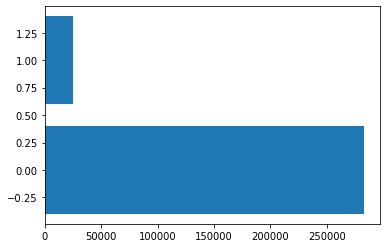

In [ ]:
plt.barh(v.index, v)

In [ ]:
#unique value INCOME_TYPE
new_df.INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [ ]:
#count of unique value INCOME_TYPE   
a=new_df.INCOME_TYPE.value_counts()
a

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: INCOME_TYPE, dtype: int64

<BarContainer object of 8 artists>

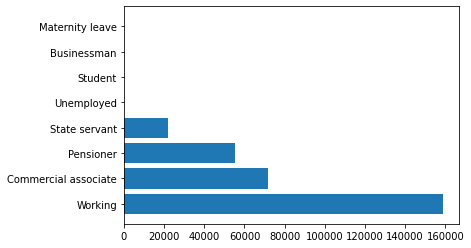

In [ ]:
plt.barh(a.index, a)

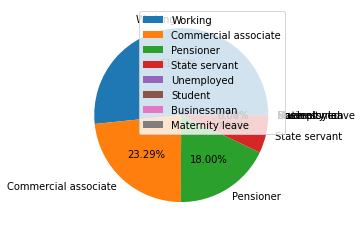

In [ ]:
plt.pie(x=a, labels=a.index, autopct='%1.2f%%')
plt.legend()
plt.show()

In [ ]:
new_df.EDUCATION.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [ ]:
b=new_df.EDUCATION.value_counts()
b

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: EDUCATION, dtype: int64

<BarContainer object of 5 artists>

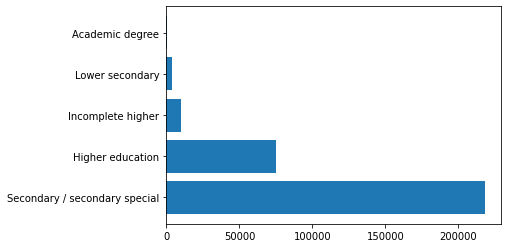

In [ ]:
plt.barh(b.index, b)

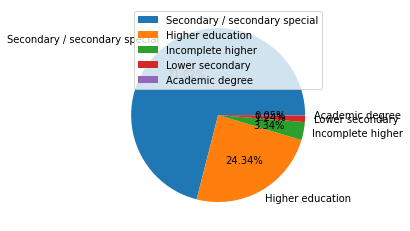

In [ ]:
plt.pie(x=b, labels=b.index, autopct='%1.2f%%')
plt.legend()
plt.show()

In [ ]:
new_df.FAMILY_STATUS.unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [ ]:
c=new_df.FAMILY_STATUS.value_counts()
c

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: FAMILY_STATUS, dtype: int64

<BarContainer object of 6 artists>

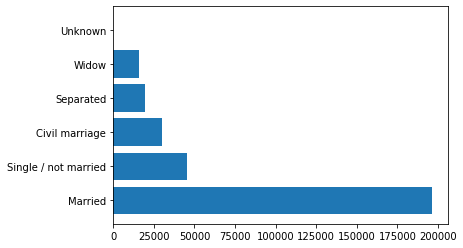

In [ ]:
plt.barh(c.index, c)

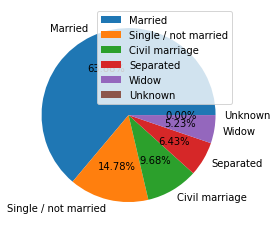

In [ ]:
plt.pie(x=c, labels=c.index, autopct='%1.2f%%')
plt.legend()
plt.show()

In [ ]:
new_df.curr_HOUSING_TYPE.unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [ ]:
d=new_df.curr_HOUSING_TYPE.value_counts()
d

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: curr_HOUSING_TYPE, dtype: int64

<BarContainer object of 6 artists>

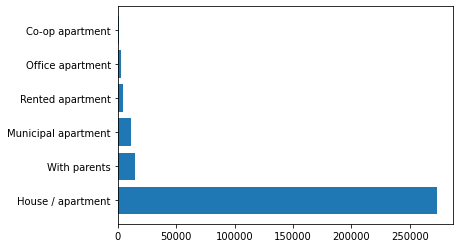

In [ ]:
plt.barh(d.index, d)

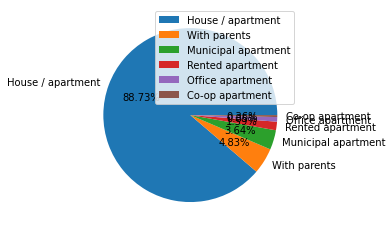

In [ ]:
plt.pie(x=d, labels=d.index, autopct='%1.2f%%')
plt.legend()
plt.show()

In [ ]:
new_df.ORGANIZATION_TYPE.unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [ ]:
plt.pyplot.hist(new_df["ORGANIZATION_TYPE"])

In [ ]:
new_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

##for catogorical data

In [ ]:
new_df.dtypes

Cust_ID                         int64
INCOME                        float64
Loan_AMT                      float64
ANNUITY                        object
GOODS_PRICE                    object
INCOME_TYPE                    object
EDUCATION                      object
FAMILY_STATUS                  object
curr_HOUSING_TYPE              object
age                             int64
Work_Exp                        int64
REGISTRATION_change           float64
DAYS_ID_PUBLISH                 int64
MOBIL_given                     int64
EMAIL_given                     int64
OCCUPATION_TYPE                object
Family_MEMBERS_no              object
REGION_CLIENT                   int64
REGION_CLIENT_CITY              int64
Perman_add_NOT_cont_REGION      int64
perman_add_NOT_WORK_add         int64
ORGANIZATION_TYPE              object
EXT_SOURCE_1                   object
EXT_SOURCE_2                   object
EXT_SOURCE_3                   object
APARTMENTS_AVG                 object
BASEMENTAREA

In [ ]:
#taking only continues data into account
cat_df=new_df[['Cust_ID','INCOME','Loan_AMT','ANNUITY','GOODS_PRICE']]

In [ ]:
cat_df.head()

,Cust_ID,INCOME,Loan_AMT,ANNUITY,GOODS_PRICE
0,100002,202500.0,406597.5,24700.5,351000.0
1,100003,270000.0,1293502.5,35698.5,1129500.0
2,100004,67500.0,135000.0,6750.0,135000.0
3,100006,135000.0,312682.5,29686.5,297000.0
4,100007,121500.0,513000.0,21865.5,513000.0


In [ ]:
#Checking Corrilation Between columns of numric continues data
cat_df.corr()

,Cust_ID,INCOME,Loan_AMT
Cust_ID,1.000000,-0.00182,-0.000343
INCOME,-0.001820,1.00000,0.156870
Loan_AMT,-0.000343,0.15687,1.000000


#ploting pairplot  for continues data to check the retaion between columns

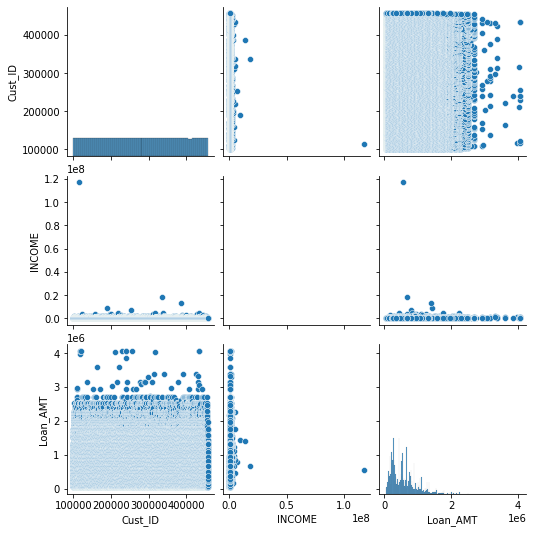

In [ ]:
sns.pairplot(data=cat_df)

#Handling Outliers

In [ ]:
##INCOME

In [ ]:
#Checking outliers for INCOME
cat_df.INCOME.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: INCOME, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


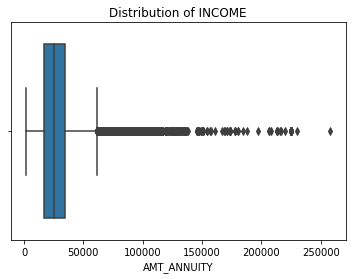

In [ ]:
sns.boxplot(cat_df.INCOME)
plt.title('Distribution of INCOME')
plt.show()

#Loan_AMT

In [ ]:
#Checking outliers for Loan Amount
cat_df.Loan_AMT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: Loan_AMT, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


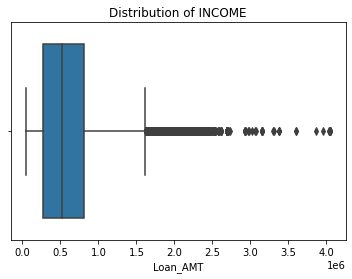

In [ ]:
sns.boxplot(cat_df.Loan_AMT)
plt.title('Distribution of INCOME')
plt.show()

In [ ]:
#Filterring data on bases of Laon amount for top 10 loan amounts
df_amt=cat_df.nlargest(10,columns='Loan_AMT')
df_amt.head()

,Cust_ID,INCOME,Loan_AMT,ANNUITY,GOODS_PRICE
14852,117337,760846.5,4050000.0,146002.5,4050000.0
17948,120926,783000.0,4050000.0,258025.5,4050000.0
110459,228135,864900.0,4050000.0,102384.0,4050000.0
119681,238782,931365.0,4050000.0,102514.5,4050000.0
120757,240007,587250.0,4050000.0,106969.5,4050000.0


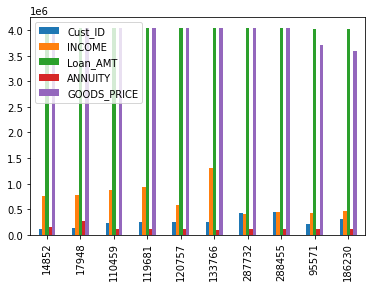

In [ ]:
#Plotting graph for approved loan amount 
df_amt.plot.bar()

#ANNUITY

In [ ]:
#Checking outliers for ANNUITY
cat_df.ANNUITY.describe()

count     307511.0
unique     13673.0
top         9000.0
freq        6385.0
Name: ANNUITY, dtype: float64

In [ ]:
cat_df.shape

(307511, 5)

In [ ]:
ann=cat_df.ANNUITY.dropna()


In [ ]:
cat_df.shape

(307511, 5)

In [ ]:
cat_df.ANNUITY.dropna()

In [ ]:
print("missing values from Annuty : ",cat_df.ANNUITY.isna().sum())

missing values from Annuty :  0


#GOODS_PRICE

In [ ]:
#Checking outliers for GOODS_PRICE
cat_df.GOODS_PRICE.describe()

count     307511.0
unique      1003.0
top       450000.0
freq       26022.0
Name: GOODS_PRICE, dtype: float64

#Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable).


In [ ]:
new_df.TARGET.unique()

array([1, 0])

In [ ]:
r=new_df.TARGET.value_counts()
r

0    282686
1     24825
Name: TARGET, dtype: int64

<BarContainer object of 2 artists>

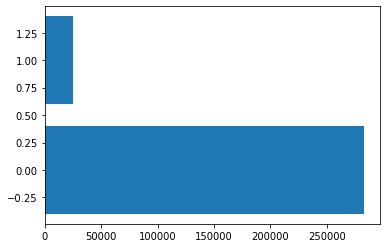

In [ ]:
plt.barh(r.index, r)

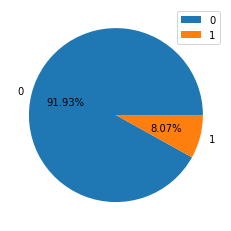

In [ ]:
plt.pie(x=r, labels=r.index, autopct='%1.2f%%')
plt.legend()
plt.show()

##Conclustion:: 8.07% of people have payment difficulty

In [ ]:
cat_df.head()

,Cust_ID,INCOME,Loan_AMT,ANNUITY,GOODS_PRICE
0,100002,202500.0,406597.5,24700.5,351000.0
1,100003,270000.0,1293502.5,35698.5,1129500.0
2,100004,67500.0,135000.0,6750.0,135000.0
3,100006,135000.0,312682.5,29686.5,297000.0
4,100007,121500.0,513000.0,21865.5,513000.0


# Binary Logistic Regression(taking into account Target as response variable)


In [ ]:
dff=new_df[['Cust_ID','TARGET','INCOME','Loan_AMT','ANNUITY','GOODS_PRICE']]

General Regression::
at least 1 catagorical predictor(we create dummy var) and respoce is continues(we have target variable as catogorical data)

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
mydf=dff[['TARGET','INCOME','Loan_AMT','ANNUITY','GOODS_PRICE']]

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(mydf.drop('TARGET', axis=1), mydf.TARGET, test_size=0.2)


#checking for Target var vs Income

In [ ]:
x = mydf[['INCOME']]
y=mydf[['TARGET']]

In [ ]:
x=sm.add_constant(x)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
x

,const,INCOME
0,1.0,202500.0
1,1.0,270000.0
2,1.0,67500.0
3,1.0,135000.0
4,1.0,121500.0
...,...,...
307506,1.0,157500.0
307507,1.0,72000.0
307508,1.0,153000.0
307509,1.0,171000.0


In [ ]:
mod = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.280512
         Iterations 7


In [ ]:
print(mod.summary())   

                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               307511
Model:                          Logit   Df Residuals:                   307509
Method:                           MLE   Df Model:                            1
Date:                Sat, 31 Dec 2022   Pseudo R-squ.:               0.0001219
Time:                        11:29:51   Log-Likelihood:                -86260.
converged:                       True   LL-Null:                       -86271.
Covariance Type:            nonrobust   LLR p-value:                 4.514e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3800      0.013   -176.495      0.000      -2.406      -2.354
INCOME     -3.142e-07   7.08e-08     -4.435      0.000   -4.53e-07   -1.75e-07


#p=value is <0.05 so Ho is rejected and it means that Income affect the person will default or not on loan repayment

#checking for Target var vs Loan_AMT

In [ ]:
x = mydf[['Loan_AMT']]
y=mydf[['TARGET']]


In [ ]:
x=sm.add_constant(x)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
x

,const,Loan_AMT
0,1.0,406597.5
1,1.0,1293502.5
2,1.0,135000.0
3,1.0,312682.5
4,1.0,513000.0
...,...,...
307506,1.0,254700.0
307507,1.0,269550.0
307508,1.0,677664.0
307509,1.0,370107.0


In [ ]:
mod1 = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.280066
         Iterations 7


In [ ]:
print(mod1.summary()) 

                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               307511
Model:                          Logit   Df Residuals:                   307509
Method:                           MLE   Df Model:                            1
Date:                Sat, 31 Dec 2022   Pseudo R-squ.:                0.001712
Time:                        12:23:30   Log-Likelihood:                -86123.
converged:                       True   LL-Null:                       -86271.
Covariance Type:            nonrobust   LLR p-value:                 3.428e-66
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2617      0.012   -190.937      0.000      -2.285      -2.239
Loan_AMT   -2.946e-07   1.75e-08    -16.825      0.000   -3.29e-07    -2.6e-07


#p=value is <0.05 so Ho is rejected and it means that Loan_AMT  affect the person will default or not on loan repayment